In [1]:
import os
from typing import Annotated

from dotenv import load_dotenv
from pathlib import Path

from jedi.inference.gradual.typing import TypedDict

# Construct path two directories up from the **current working directory**
env_path = Path.cwd().resolve().parents[1] / '.env'

# Load .env from that path
load_dotenv(dotenv_path=env_path)

cohere_api_key = os.getenv('COHERE_API_KEY')
if cohere_api_key is None:
    raise ValueError("COHERE_API_KEY not set in .env")

#print(cohere_api_key)  # For debug only

groq_api_key = os.getenv('GROQ_API_KEY')
if groq_api_key is None:
    raise ValueError("GROQ_API_KEY not set in .env")

# Optional: explicitly set in os.environ if required by libraries
os.environ['COHERE_API_KEY'] = cohere_api_key
os.environ['GROQ_API_KEY'] = groq_api_key


In [2]:
import os

# Starting from your current working directory
base_dir = os.getcwd()  # or set explicitly

user_id = 1 # In future I should get this via API

# Build the path
media_path = os.path.join(base_dir, "media", "documents", f"user_{user_id}")

print("Full path:", media_path)

#with open(os.path.join(media_path, "Lab0_Laravel11.pdf")) as f:
#    text = f.read()


Full path: /home/matthew/Desktop/med-assistant-project/rag/notebooks/media/documents/user_1


In [1]:
# Install the splitter module (if needed)
# pip install -qU langchain-text-splitters

from langchain_text_splitters import RecursiveCharacterTextSplitter

#print(media_path)

# For testing in ipynb
from langchain_community.document_loaders import PyPDFLoader
loader = []

loader = PyPDFLoader('/home/matthew/Desktop/med-assistant-project/backend/media/documents/user_1/Lab0_Laravel11.pdf')
pages = loader.load()

"\n".join(pages[page].page_content for page in range(len(pages)))


# Initialize the splitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1800,         # max characters per chunk
    chunk_overlap=300,       # overlap between chunks
    length_function=len,    # use character count
    separators=["\n\n", "\n", " ", ""],  # split hierarchy
    is_separator_regex=False
)

docs = text_splitter.split_documents(pages)

# Inspect first couple of chunks:
print(docs[7])

/home/matthew/miniconda3/envs/ML_REST/lib/python3.13/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


page_content='7 
Zintegrowany Program Rozwoju Politechniki Lubelskiej – część druga 
 
Laravel Breeze  domyślnie generuje strony za pomocą wi doków Blade, ale m ożna 
skonfigurować go do wykorzystania widoków wykorzystujących Vue, React lub Inertia. 
Najprostsza konfiguracja korzysta z domyślego silnika widoków Blade.  Ten silnik oraz 
Breeze wskazaliśmy przy tworzeniu nowego projektu. 
 
Aby poprawnie działało uwierzytelnienie użytkownika, należy wykorzystać (utworzone już 
w tym celu przez Laravel) elementy związane z zapisem danych użytkownika w bazie danych 
(domyślnie MySQL) . W celu ustawienia połączenia do bazy danych, w pliku .env 
(w głównym folderze projektu) należy podać dane autoryzujące dostęp do bazy danych. Dla 
MySQL domyślne ustawienia w pliku .env (DB_CONNECTION, DB_HOST, itd.) są już 
gotowe (Rys. 12.8). 
 
 
Rys. 12.8. Domyślne ustawienia połączenia do bazy o nazwie lab12 na serwerze MySQL 
Korzystając z narzędzia phpMyAdmin utwórz nową bazę danych o nazwie lab12 (t

In [6]:
type(pages[1].page_content)

str

In [7]:
print("\n".join(pages[page].page_content for page in range(len(pages))))

LABORATORIUM 12 CZĘŚĆ 1. IMPLEMENTACJA WZORCA PROJEKTOWEGO 
MVC W PRZYKŁADOWEJ APLIKACJI TYPU CRUD 
(LARAVEL V11) 
Cel laboratorium: 
Celem zajęć jest przygotowanie aplikacji w oparciu o wytyczne wzorca projektowego 
MVC i poznanie podstawowych elementów implementacji tego wzorca w języku PHP  na 
przykładzie szkieletu programistycznego Laravel. 
Zakres tematyczny zajęć: 
Poznanie podstawowych elementów wzorca MVC na przyk ładzie szkieletu 
programistycznego Laravel w PHP. Utworzenie prostej aplikacji z autoryzacją użytkowników 
do zarządzania komentarzami. Obsługa akcji dodawania do bazy i pobierania danych z bazy. 
Pytania kontrolne: 
1. Co to są wzorce projektowe? 
2. Wyjaśnij skrót MVC i scharakteryzuj jego elementy. 
3. Wyjaśnij skrót ORM. Kiedy warto skorzystać z narzędzi ORM? 
Zadanie 1 2.1. Przygotowanie aplikacji z autoryzacją użytkownika do  obsługi akcji 
dodawania i wyświetlania komentarzy 
Do wykonania przykładowej aplikacji skorzystamy z pakietu XAMPP, menedżera pakietów 

In [10]:
print(type(loader))
print(type(pages))

<class 'langchain_community.document_loaders.pdf.PyPDFLoader'>
<class 'list'>


In [4]:
type(docs[1])

langchain_core.documents.base.Document

In [5]:
type(docs[1])

langchain_core.documents.base.Document

In [4]:
import cohere

co = cohere.ClientV2()

text_inputs = [
    {
        "content": [
            {"type": "text", "text": f"{docs[7]}"}
        ]
    },
]

response = co.embed(
    inputs=text_inputs,
    model="embed-v4.0",
    input_type="classification",
    embedding_types=["float"],
)
print(response)


id='d247232e-ed3a-4d43-8ab9-0cb24e28b4b6' embeddings=EmbedByTypeResponseEmbeddings(float_=[[0.008361816, -0.0045776367, -0.018432617, 0.0021972656, 0.00075912476, -0.0061035156, -0.0034942627, 0.016967773, -0.017456055, 0.030273438, -0.039794922, 0.072265625, -0.05883789, 0.0012054443, -0.020874023, 0.004760742, -0.024169922, -0.008178711, 0.015197754, -0.0019302368, 0.05810547, -0.020385742, 0.0015106201, -0.02758789, 0.017456055, 0.0014038086, 0.02709961, 0.009643555, 0.032226562, -0.02734375, -0.007659912, -0.024291992, -0.001083374, 0.0061035156, -0.09033203, -0.010864258, 0.013000488, -0.040283203, -0.028930664, 0.012268066, -0.013061523, -0.008728027, 0.024536133, 0.032470703, -0.045410156, -0.010009766, 0.014160156, -0.016235352, -0.052246094, 0.00051498413, 0.020629883, 0.025756836, -0.006378174, -0.026855469, 0.04345703, 0.024047852, -0.0013046265, 0.003753662, -0.030273438, 0.02746582, -0.0032348633, 0.04711914, 0.04296875, -0.0009727478, -0.044433594, 0.010375977, -0.0303955

In [7]:
from groq import Groq

client = Groq()

chat_completion = client.chat.completions.create(
    messages=[
        # Set an optional system message. This sets the behavior of the
        # assistant and can be used to provide specific instructions for
        # how it should behave throughout the conversation.
        {
            "role": "system",
            "content": "You are a doctor, explain things thoroughly, try to analyze which illness could the patient suffer from. and what's the best solution to resolve it."
        },
        # Set a user message for the assistant to respond to.
        {
            "role": "user",
            "content": "Teach me how to learn quicker",
        }
    ],

    # The language model which will generate the completion.
    model="llama-3.3-70b-versatile"
)

print("Given 3 choices with higher randomness: \n")
num_choices = 3
#for i in range(num_choices):
 #   print(chat_completion.choices[i].message.content)

# Print the completion returned by the LLM.
print(chat_completion.choices[0].message.content)

Given 3 choices with higher randomness: 

Learning is a complex process that involves multiple cognitive, emotional, and environmental factors. To help you learn quicker, I'll provide you with a comprehensive approach that incorporates various strategies, techniques, and tips.

**Understanding How We Learn**

Before we dive into the strategies, let's briefly discuss how our brains process information. The human brain has an incredible ability to reorganize and adapt throughout life, a concept known as neuroplasticity. When we learn, our brains create new connections between neurons, which can be strengthened or weakened based on the frequency and quality of use.

**Effective Learning Strategies**

1. **Setting Clear Goals**: Establishing specific, measurable, achievable, relevant, and time-bound (SMART) goals helps you focus on what you want to learn. Break down larger goals into smaller, manageable chunks, and prioritize them based on importance and urgency.
2. **Active Recall**: This

In [9]:
"""
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS

urls = [
    "https://www.matthewlozinski.com/",
]

docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=512, chunk_overlap=0
)
doc_splits = text_splitter.split_documents(docs_list)

vectorstore = FAISS.from_documents(
    documents=doc_splits,
    embedding=co,
)

vectorstore_retriever = vectorstore.as_retriever()
"""

'\nfrom langchain.text_splitter import RecursiveCharacterTextSplitter\nfrom langchain_community.document_loaders import WebBaseLoader\nfrom langchain_community.vectorstores import FAISS\n\nurls = [\n    "https://www.matthewlozinski.com/",\n]\n\ndocs = [WebBaseLoader(url).load() for url in urls]\ndocs_list = [item for sublist in docs for item in sublist]\n\ntext_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(\n    chunk_size=512, chunk_overlap=0\n)\ndoc_splits = text_splitter.split_documents(docs_list)\n\nvectorstore = FAISS.from_documents(\n    documents=doc_splits,\n    embedding=co,\n)\n\nvectorstore_retriever = vectorstore.as_retriever()\n'

In [10]:
import os

# Path to shared documents inside the container
documents_path = "/app/shared_documents/user_1"

# List files
files = os.listdir(documents_path)

# Print the list of files
print(files)

FileNotFoundError: [Errno 2] No such file or directory: '/app/shared_documents/user_1'

In [11]:
class State(TypedDict):
    pass
    #messages: Annotated[list, add_messages]

In [5]:
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS
from langchain_cohere import CohereEmbeddings


embeddings = CohereEmbeddings(model="embed-v4.0")
index = faiss.IndexFlatL2(len(embeddings.embed_query("hello world")))

vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(), # It is in RAM, thus in future I will need to store it in Postgres container's volume
    index_to_docstore_id={},
)

# Add documents to the vector store
documents = [doc for doc in docs if doc is not None]
ids = [f"{i}" for i in range(1, len(docs) + 1, 1)]
vector_store.add_documents(documents=documents, ids=ids)

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33']

In [17]:
type(vector_store)

langchain_community.vectorstores.faiss.FAISS

In [8]:
type(vector_store)

langchain_community.vectorstores.faiss.FAISS

In [12]:
# for dev testing on embeddings accuracy
results = vector_store.similarity_search_with_score(query="phpmyadmin wraz z mongo czy top mozliwe",k=3)
for doc, score in results:
    print(f"* [SIM={score:3f}] {doc.page_content} [{doc.metadata}]")

* [SIM=1.412498] 13 
Zintegrowany Program Rozwoju Politechniki Lubelskiej – część druga 
 
 
Rys. 12.18. Wykonanie migracji 
 
Sprawdź w PhpMyAdmin efekt wykonania polecenia  z Rys. 12.1 8. Następnie utwórz klasę 
modelu Comment (zwróć uwagę na liczbę pojedynczą w  nazwie modelu ), który będzie 
abstrakcyjną reprezentacją bytu bazodanowego dla tabeli komentarzy z  poziomu aplikacji  
(Rys. 12.19): 
php artisan make:model Comment 
 
 
Rys. 12.19. Polecenie tworzenia modelu 
 
W wyniku wykonania polecenia  z Rys. 12. 19, w katalogu app/Models utworzył się plik 
Comment.php z definicją klasy Comment. Dodaj do niego fragment ( Rys. 12.20) definiujący 
relację jeden do jednego (jeden komentarz ma jednego autora).  
Dodaj także import klasy User. [{'producer': 'Microsoft® Word 2010', 'creator': 'Microsoft® Word 2010', 'creationdate': '2024-11-29T21:25:14+01:00', 'author': 'Marcel', 'moddate': '2024-11-29T21:25:14+01:00', 'source': '/home/matthew/Desktop/med-assistant-project/backend/media/do

In [11]:
for doc, score in results:
    print(type(doc.metadata))
    print(type(doc.page_content))

<class 'dict'>
<class 'str'>


In [13]:
# Reranking the documents based on best document's embeddings
co_rerank = cohere.ClientV2()

docs = [doc.page_content + " " + str(doc.metadata) for doc, score in results]

response = co_rerank.rerank(
    model="rerank-v3.5",
    query="What is the capital of the United States?",
    documents=docs,
    top_n=3,
)
print(response)


id='25aa065e-62cb-496e-96af-302d2b0b8fec' results=[V2RerankResponseResultsItem(document=None, index=1, relevance_score=0.044039294), V2RerankResponseResultsItem(document=None, index=0, relevance_score=0.03733048), V2RerankResponseResultsItem(document=None, index=2, relevance_score=0.036291793)] meta=ApiMeta(api_version=ApiMetaApiVersion(version='2', is_deprecated=None, is_experimental=None), billed_units=ApiMetaBilledUnits(images=None, input_tokens=None, output_tokens=None, search_units=1.0, classifications=None), tokens=None, warnings=None)


In [18]:
user_message = "Jak mam używać PhpMyadmina z mongodb, czy to wgl mozliwe?"
results = vector_store.similarity_search(query=f"{user_message}",k=1)

In [19]:
print(results)

[Document(id='14', metadata={'producer': 'Microsoft® Word 2010', 'creator': 'Microsoft® Word 2010', 'creationdate': '2024-11-29T21:25:14+01:00', 'author': 'Marcel', 'moddate': '2024-11-29T21:25:14+01:00', 'source': '/home/matthew/Desktop/med-assistant-project/backend/media/documents/user_1/Lab0_Laravel11.pdf', 'total_pages': 30, 'page': 12, 'page_label': '13'}, page_content='13 \nZintegrowany Program Rozwoju Politechniki Lubelskiej – część druga \n \n \nRys. 12.18. Wykonanie migracji \n \nSprawdź w PhpMyAdmin efekt wykonania polecenia  z Rys. 12.1 8. Następnie utwórz klasę \nmodelu Comment (zwróć uwagę na liczbę pojedynczą w  nazwie modelu ), który będzie \nabstrakcyjną reprezentacją bytu bazodanowego dla tabeli komentarzy z  poziomu aplikacji  \n(Rys. 12.19): \nphp artisan make:model Comment \n \n \nRys. 12.19. Polecenie tworzenia modelu \n \nW wyniku wykonania polecenia  z Rys. 12. 19, w katalogu app/Models utworzył się plik \nComment.php z definicją klasy Comment. Dodaj do niego fra

In [14]:
retriever = vector_store.as_retriever(
    search_type="similarity", # Maybe with threshold, but I would have to monitor and investigate it in the production.
    search_kwargs={"k": 3},
)
retriever.invoke("Jak mam używać PhpMyadmina z mongodb, czy to wgl mozliwe?")

[Document(id='14', metadata={'producer': 'Microsoft® Word 2010', 'creator': 'Microsoft® Word 2010', 'creationdate': '2024-11-29T21:25:14+01:00', 'author': 'Marcel', 'moddate': '2024-11-29T21:25:14+01:00', 'source': '/home/matthew/Desktop/med-assistant-project/backend/media/documents/user_1/Lab0_Laravel11.pdf', 'total_pages': 30, 'page': 12, 'page_label': '13'}, page_content='13 \nZintegrowany Program Rozwoju Politechniki Lubelskiej – część druga \n \n \nRys. 12.18. Wykonanie migracji \n \nSprawdź w PhpMyAdmin efekt wykonania polecenia  z Rys. 12.1 8. Następnie utwórz klasę \nmodelu Comment (zwróć uwagę na liczbę pojedynczą w  nazwie modelu ), który będzie \nabstrakcyjną reprezentacją bytu bazodanowego dla tabeli komentarzy z  poziomu aplikacji  \n(Rys. 12.19): \nphp artisan make:model Comment \n \n \nRys. 12.19. Polecenie tworzenia modelu \n \nW wyniku wykonania polecenia  z Rys. 12. 19, w katalogu app/Models utworzył się plik \nComment.php z definicją klasy Comment. Dodaj do niego fra

In [5]:
from typing import Annotated, List

from langchain_community.document_loaders import WebBaseLoader
from langchain_core.tools import tool

MEDICAL_SITES = [
    {
        "name": "Matthew Clinic",
        "url": "https://www.matthewlozinski.com/",
        "description": "Trusted medical researcher from a world-renowned clinical and research institution. Offers detailed content on diseases, conditions, tests, and procedures."
    },
    {
        "name": "Mayo Clinic",
        "url": "https://www.mayoclinic.org",
        "description": "Trusted medical information from a world-renowned clinical and research institution. Offers detailed content on diseases, conditions, tests, and procedures."
    },
    {
        "name": "WebMD",
        "url": "https://www.webmd.com",
        "description": "Popular consumer health site featuring a symptom checker, drug info, and doctor-reviewed health articles written in layman's terms."
    },
    {
        "name": "MedlinePlus",
        "url": "https://medlineplus.gov",
        "description": "A service of the U.S. National Library of Medicine providing free, reliable health information in multiple languages with no ads or commercial bias."
    },
    {
        "name": "Healthline",
        "url": "https://www.healthline.com",
        "description": "Health and wellness site with medical articles reviewed by experts, covering fitness, nutrition, mental health, and medical conditions."
    },
    {
        "name": "BMJ (British Medical Journal)",
        "url": "https://www.bmj.com",
        "description": "Leading peer-reviewed journal providing clinical research, reviews, medical news, and opinion pieces for healthcare professionals."
    }
]

def scrape_webpages(urls: List[str]) -> str:
    """Use requests and bs4 to scrape the provided web pages for detailed information."""
    loader = WebBaseLoader([site["url"] for i, site in enumerate(MEDICAL_SITES) if i == 1])
    docs = loader.load()
    return "\n\n".join(
        [
            f'<Document name="{doc.metadata.get("title", "")}">\n{doc.page_content}\n</Document>'
            for doc in docs
        ]
    )

scrape_webpages([site["url"] for i, site in enumerate(MEDICAL_SITES) if i == 1])

'<Document name="Top-ranked Hospital in the Nation - Mayo Clinic">\nTop-ranked Hospital in the Nation - Mayo Clinic\n\nSkip to contentCare at \n Mayo Clinic Patient-Centered Care About Mayo Clinic Request Appointment Find a Doctor Locations Clinical Trials Connect to Support Groups Patient & Visitor Guide Billing & Insurance Departments & Centers International Services Contact UsPatient & Visitor Guide Health \n Library Diseases & Conditions Symptoms Tests & Procedures Drugs & Supplements Healthy Lifestyle Mayo Clinic Health Letter & BooksMayo Clinic Health Letter & Books For Medical \n Professionals Medical Professional Resources Refer a Patient Continuing Medical Education AskMayoExpert Mayo Clinic Laboratories Video Center Journals & Publications Mayo Clinic Alumni AssociationContinuing Medical Education Research & Education \n at Mayo ClinicResearch Research at Mayo Clinic Research Faculty Laboratories Core Facilities Centers & Programs Departments & Divisions Clinical Trials Insti

In [16]:
from langchain_groq import ChatGroq

llm_rewriter = ChatGroq(temperature=0.01, model="llama-3.1-8b-instant")
llm_answerer = ChatGroq(temperature=0.5, model="deepseek-r1-distill-llama-70b")

human_message = "So, I was wondering, like, what’s the actual difference between PostgreSQL and phpMyAdmin? Because I know both are kind of related to databases, right? But I’m not really sure if one of them is the database itself and the other is just a tool or something to look at the data, or maybe they both do the same thing in different ways? Also, can you use phpMyAdmin with PostgreSQL, or is it only for something like MySQL? I feel a bit confused because people talk about them like they’re both important, but I don’t know how they work together or if they even do."

messages = [
    (
        "system",
        "You are a helpful assistant that rewrites verbose user questions into short, keyword-rich queries suitable for vector similarity search. Do not answer the question. Only return the rewritten query.\n\nExample:\nInput: 'Can you explain what the difference is between SQL and NoSQL databases and when to use them?'\nOutput: 'difference SQL vs NoSQL databases usage scenario'\n",
    ),
    ("human", f"{human_message}"),
]

ai_msg = llm_rewriter.invoke(messages)
ai_msg

AIMessage(content='PostgreSQL vs phpMyAdmin difference database tool relationship', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 232, 'total_tokens': 243, 'completion_time': 0.03058522, 'prompt_time': 0.013696378, 'queue_time': 0.038573243, 'total_time': 0.044281598}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_348199b5a7', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--49eac85d-5fe6-4236-b88c-d3e9c0ffbc63-0', usage_metadata={'input_tokens': 232, 'output_tokens': 11, 'total_tokens': 243})

In [1]:
import os
from typing import Annotated

from dotenv import load_dotenv, find_dotenv
from pathlib import Path

from jedi.inference.gradual.typing import TypedDict

# Construct path two directories up from the **current working directory**
env_path = Path.cwd().resolve().parents[1] / '.env'

# Load .env from that path
# load_dotenv(dotenv_path=env_path)
load_dotenv(find_dotenv(), override=True)


cohere_api_key = os.getenv('COHERE_API_KEY')
if cohere_api_key is None:
    raise ValueError("COHERE_API_KEY not set in .env")

#print(cohere_api_key)  # For debug only

groq_api_key = os.getenv('GROQ_API_KEY')
if groq_api_key is None:
    raise ValueError("GROQ_API_KEY not set in .env")

langsmith_api_key = os.getenv('LANGSMITH_API_KEY')
if langsmith_api_key is None:
    raise ValueError("LANGSMITH_API_KEY not set in .env")

# Optional: explicitly set in os.environ if required by libraries
os.environ['COHERE_API_KEY'] = cohere_api_key
os.environ['GROQ_API_KEY'] = groq_api_key
os.environ['LANGSMITH_API_KEY'] = langsmith_api_key


In [2]:
from pathlib import Path
import logging
from datetime import datetime
import sys

# Handle notebooks (__file__ doesn't exist)
if "__file__" in globals():
    BASE_DIR = Path(__file__).resolve().parent
else:
    BASE_DIR = Path.cwd()

LOGS_DIR = BASE_DIR
LOGS_DIR.mkdir(parents=True, exist_ok=True)

LOG_FILE = LOGS_DIR / f"log_{datetime.now().strftime('%Y-%m-%d')}.log"

logging.basicConfig(
    filename=str(LOG_FILE),
    format="%(asctime)s - %(levelname)s - %(message)s",
    level=logging.INFO,
)

def get_logger(name="default_logger", level=logging.INFO):
    logger = logging.getLogger(name)
    logger.setLevel(level)
    return logger


In [3]:
import langchain_community
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, List, Literal, Optional, Union
from typing_extensions import TypedDict
import operator
from langchain_groq import ChatGroq
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS
from langchain_cohere import CohereEmbeddings
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
import cohere
from langchain_core.documents.base import Document
import re


os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "RAG-Medical-Project"

llm_rewriter = ChatGroq(temperature=0.01, model="llama-3.1-8b-instant")
llm_answerer = ChatGroq(temperature=0.5, model="deepseek-r1-distill-llama-70b")

rewrites_redirection = None

# Define the state with message history
class State(TypedDict, total=False):
    messages: Annotated[List, add_messages]
    rewritten_query: Optional[str]
    retrieved_docs: List[str]
    retrieved_webpage_docs: List[str]
    reflection_count: int
    router_decision: Optional[Literal["scrape_webpages", "self_reflect", "answerer", "rewriter", "retriever"]]
    user_prompt: Optional[str]
    scraped_count: int
    input_docs: List[Document]
    last_reflection: Optional[str]
    rewrites_redirection: bool

logger = get_logger()
logger.info("It's me")

def rewriter(state: State) -> State:
    """Rewrite user message to be keyword-friendly for vector search"""
    # Get the last user message - fixed to access content attribute

    global rewrites_redirection

    logger.info("REWRITER!!!")
    logger.info("I am being launched")
    logger.info(f"I see: state[rewrites_redirection] as {state["rewrites_redirection"]}")

    logger.info(f"Here is the value of, rewrites_redirection global variable: {rewrites_redirection} (1)")

    human_message = state["user_prompt"]

    messages = [
        SystemMessage(content="You are a helpful assistant that rewrites verbose user questions into short, keyword-rich queries suitable for vector similarity search. Do not answer the question. Only return the rewritten query.\n\nExample:\nInput: 'Can you explain what the difference is between SQL and NoSQL databases and when to use them?'\nOutput: 'difference SQL vs NoSQL databases usage scenario'\n"),
        HumanMessage(content=human_message),
    ]

    # Your LLM call to rewrite the query
    rewritten = llm_rewriter.invoke(messages)

    logger.info(f"Here is the value of, rewrites_redirection global variable: {rewrites_redirection} (2)")


    return {
        "messages": [SystemMessage(content=f"Query rewritten to: {rewritten.content}")],
        "rewritten_query": rewritten.content,
        "rewrites_redirection": rewrites_redirection
    }

def retriever(state: State) -> State:
    """Retrieve documents based on rewritten query"""

    logger.info("RETRIVER!!!")
    logger.info("I am being launched")

    query = state["rewritten_query"]
    embeddings = CohereEmbeddings(model="embed-v4.0")
    index = faiss.IndexFlatL2(len(embeddings.embed_query("hello world")))

    vector_store = FAISS(
        embedding_function=embeddings,
        index=index,
        docstore=InMemoryDocstore(), # It is in RAM, thus in future I will need to store it in Postgres container's volume
        index_to_docstore_id={},
    )
    docs = state["input_docs"]
    # Add documents to the vector store - only if docs exist
    if docs:
        documents = [doc for doc in docs if doc is not None]
        ids = [f"{i}" for i in range(1, len(documents) + 1, 1)]
        vector_store.add_documents(documents=documents, ids=ids)
        results = vector_store.similarity_search_with_score(query=query, k=3)

        co_rerank = cohere.ClientV2()

        docs_content = [doc.page_content + " " + str(doc.metadata) for doc, score in results]

        response = co_rerank.rerank(
            model="rerank-v3.5",
            query=query,
            documents=docs_content,
            top_n=3,
        )

        reranked_docs = [docs_content[result.index] for result in response.results]
    else:
        reranked_docs = []

    return {
        "messages": [SystemMessage(content=f"Retrieved {len(reranked_docs)} documents")],
        "retrieved_docs": reranked_docs
    }

def router(state: State) -> State:
    """Decide whether to scrape web, self-reflect, or respond to user"""

    logger.info("ROUTER!!!")
    logger.info("I am being launched")

    if state["user_prompt"] is None:
        human_message = state["messages"][-1].content
    else:
        human_message = state["user_prompt"]

    reflection_count = state.get("reflection_count", 0)
    retrieved_docs = state.get("retrieved_docs", [])
    scraped_count = state.get("scraped_count", 0)

    retrieved_doc_info = f" retrieved documents: {retrieved_docs}" if retrieved_docs else ""
    retrieved_webpages_info = f", on the retrieved medical websites content: {retrieved_docs}" if retrieved_docs else ""

    prompt = f"""
    Your task is to route to the other option, writing simply one word.
    Based on the:
    {retrieved_doc_info}
    {retrieved_webpages_info}
    , reflection count: {reflection_count}
    , and scraped count: {scraped_count}

    Should I:
    1. "scrape_webpages" - if scraped webpages's docs are insufficient (or scrape count is greater than 3), but you must DO THIS at least once!
    2. "retrieve_docs" - if retrieved docs are insufficient (or scrape count is greater than 3), but you must DO THIS at least once!
    3. "self_reflect" - if I need to analyze more (can do it only if reflection count is lesser than 3)
    4. "answerer" - if I'm ready to respond (or scrape count is greater than 3)

    Remember you MUST return only one of these four words: retrieve_docs, scrape_webpages, self_reflect, or answerer.
    """
    llm_decision = llm_answerer.invoke([SystemMessage(content=prompt), HumanMessage(content="Respond with only one word, out of these three words: retrieve_docs, scrape_webpages, self_reflect, or answerer.")]).content.strip()
    words = ("router_decision", "answerer", "retrieve_docs", "scrape_webpages", "self_reflect")
    pattern = r"(" + "|".join(words) + r")(?=[^a-zA-Z_]|$)"

    logger.info(f"I am a router node and this is llm_decision: {llm_decision}")
    matches = list(re.finditer(pattern, llm_decision))

    solution = matches[-1].group(1) if matches else None

    return {
        "messages": [SystemMessage(content=f"Router decision: {solution}")],
        "router_decision": solution,
        "user_prompt": human_message,
    }


from langchain_community.document_loaders import WebBaseLoader

medical_sites = [
    {
        "name": "Mayo Clinic",
        "url": "https://www.mayoclinic.org",
        "description": "Trusted medical information from a world-renowned clinical and research institution. Offers detailed content on diseases, conditions, tests, and procedures."
    },
    {
        "name": "WebMD",
        "url": "https://www.webmd.com",
        "description": "Popular consumer health site featuring a symptom checker, drug info, and doctor-reviewed health articles written in layman's terms."
    }
]

def scrape_webpages(state: State) -> State:
    """Scrape web pages for additional information"""
    # Soon I should add a model to check which sites to visit.

    logger.info("SCRAPER OF THE WEBSITES!!!")
    logger.info("I am being launched")

    try:
        loader = WebBaseLoader([site["url"] for site in medical_sites])
        docs_scraped = loader.load()

        if docs_scraped:
            scraped_content = f"Scraped content from the chosen websites, with their titles related to {state['rewritten_query']}, is as follows: '<Document name={docs_scraped[0].metadata.get('title', '')}>\n{docs_scraped[0].page_content}\n</Document>'"
        else:
            scraped_content = "No content was scraped from the websites."
    except Exception as e:
        scraped_content = f"Error scraping websites: {str(e)}"

    # Add scraped content to retrieved docs
    updated_docs = state["retrieved_webpage_docs"] + [scraped_content]

    return {
        "messages": [SystemMessage(content="Web scraping completed, retrieved docs")],
        "retrieved_webpage_docs": updated_docs
    }

def self_reflect(state: State) -> State:

    logger.info("SELF REFLECT!!!")
    logger.info("I am being launched")

    reflection_count = state.get("reflection_count", 0) + 1
    last_reflection = f", and on your last reflection: {state["last_reflection"]}" if state["last_reflection"] is not None else ""
    reflection = llm_answerer.invoke([HumanMessage(content=f"Analyze this, and reflect on the following:, the prompt from a user: {state['user_prompt']}, and on the documents {state['retrieved_docs']} and/or medical websites content that were previously retrieved: {state['retrieved_webpage_docs']}{last_reflection}")])

    return {
        "messages": [AIMessage(content=reflection.content)],
        "reflection_count": reflection_count,
        "last_reflection": reflection
    }

def answerer(state: State) -> State:
    """Generate final response to user"""

    logger.info("ANSWERER!!!")
    logger.info("I am being launched")

    answer = llm_answerer.invoke([HumanMessage(content=f"Answer based on retrieved documents: {state['retrieved_docs']}, documents scraped from the websites; {state['retrieved_webpage_docs']} on your previous self reflection on the user question: {state['last_reflection']} and on the initial user prompt {state['user_prompt']}")]) # Also on it's last reflection

    return {
        "messages": [AIMessage(content=answer.content)]
    }


def route_decision(state: State) -> Literal["scrape_webpages", "self_reflect", "answerer", "rewriter", "retriever"]:

    logger.info("ROUTE DECISION NODE LAUNCHED!!!")
    logger.info("I am being launched")

    decision = state.get("router_decision", "answerer")
    valid_routes = {"scrape_webpages", "rewriter", "retriever", "self_reflect", "answerer"}
    if decision not in valid_routes:
        logger.error(f"Invalid decision from router: {decision}")
    if decision in ("scrape_webpages", "retrieve_docs"):
        logger.info("I am in decision in (scrape_webpage, retrieve_docs) condition")
        if state["rewritten_query"] is None:
            global rewrites_redirection
            if decision == "retrieve_docs":
                rewrites_redirection = True
            else:
                rewrites_redirection = False
            logger.info(f"Here is the value of, rewrites_redirection global variable: {rewrites_redirection}")
            return "rewriter"

    if decision == "scrape_webpages":
        return "scrape_webpages"
    elif decision == "self_reflect":
        return "self_reflect"
    elif decision == "retrieve_docs":
        return "retriever"
    else:
        logger.info("I am defaulting to answerer")
        logger.info("I am defaulting to answerer")
        logger.info(f"This is routers decision {state.get("router_decision", "answerer")}")
        return "answerer"


# Create the graph
def create_rag_graph():
    rag = StateGraph(State)

    rag.add_node("router", router)
    rag.add_node("rewriter", rewriter)
    rag.add_node("retriever", retriever)
    rag.add_node("scrape_webpages", scrape_webpages)
    rag.add_node("self_reflect", self_reflect)
    rag.add_node("answerer", answerer)

    # Add edges
    rag.add_edge(START, "router")

    # Conditional edges from router
    rag.add_conditional_edges(
        "router",
        route_decision,
        {
            "scrape_webpages": "scrape_webpages",
            "rewriter": "rewriter",
            "retriever": "retriever",
            "self_reflect": "self_reflect",
            "answerer": "answerer"
        }
    )

    rag.add_conditional_edges(
        "rewriter",
        lambda state: state["rewrites_redirection"],
        {
            True: "retriever",
            False: "scrape_webpages"
        }
    )

    rag.add_edge("scrape_webpages", "router")

    rag.add_edge("self_reflect", "router")

    rag.add_edge("retriever", "router")

    rag.add_edge("answerer", END)

    return rag.compile()

"""
# Create the compiled graph
rag_graph = create_rag_graph()

# Example usage
initial_state = {
    "messages": [HumanMessage(content="What is machine learning?")],
    "rewritten_query": "",
    "retrieved_docs": [],
    "reflection_count": 0,
    "router_decision": "",
    "input_docs": docs
}

# Run the graph
final_state = rag_graph.invoke(initial_state)
print("Final messages:", final_state["messages"])
"""

/home/matthew/miniconda3/envs/ML_REST/lib/python3.13/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


'\n# Create the compiled graph\nrag_graph = create_rag_graph()\n\n# Example usage\ninitial_state = {\n    "messages": [HumanMessage(content="What is machine learning?")],\n    "rewritten_query": "",\n    "retrieved_docs": [],\n    "reflection_count": 0,\n    "router_decision": "",\n    "input_docs": docs\n}\n\n# Run the graph\nfinal_state = rag_graph.invoke(initial_state)\nprint("Final messages:", final_state["messages"])\n'

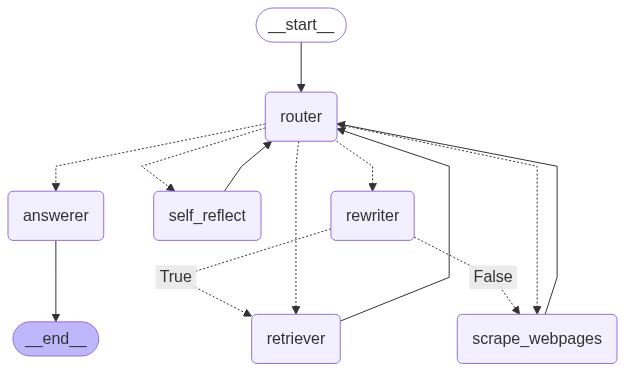

In [4]:
from IPython.display import Image, display

# Assuming 'compiled_graph' is your compiled workflow
display(Image(create_rag_graph().get_graph().draw_mermaid_png()))

In [17]:
logger = get_logger()
logger.info("It's me")

In [5]:
# Install the splitter module (if needed)
# pip install -qU langchain-text-splitters

from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader

#print(media_path)

# For testing in ipynb


loader = PyPDFLoader('/home/matthew/Desktop/med-assistant-project/backend/media/documents/user_1/Lab0_Laravel11.pdf')
pages = loader.load()




# Initialize the splitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1800,         # max characters per chunk
    chunk_overlap=300,       # overlap between chunks
    length_function=len,    # use character count
    separators=["\n\n", "\n", " ", ""],  # split hierarchy
    is_separator_regex=False
)

docs = text_splitter.split_documents(pages)

# Inspect first couple of chunks:
print(docs[7])

rag_graph = create_rag_graph()

# Example usage
initial_state = {
    "messages": [HumanMessage(content="I am kinda sick, my headache, I would like to search web for it...")],
    "rewritten_query": None,
    "user_prompt": None,
    "retrieved_docs": [],
    "retrieved_webpage_docs": [],
    "reflection_count": 0,
    "scraped_count": 0,
    "router_decision": None,
    "input_docs": docs,
    "last_reflection": None,
    "rewrites_redirection": None
}

class State(TypedDict):
    messages: Annotated[List, add_messages]
    rewritten_query: Optional[str]
    retrieved_docs: List[str]
    retrieved_webpage_docs: List[str]
    reflection_count: int
    router_decision: str
    user_prompt: Optional[str]
    scraped_count: int
    input_docs: List[Document]
    last_reflection: Optional[str]
    rewrites_redirection: bool

# Run the graph
final_state = rag_graph.invoke(initial_state)
print("Final messages:", final_state["messages"])

page_content='7 
Zintegrowany Program Rozwoju Politechniki Lubelskiej – część druga 
 
Laravel Breeze  domyślnie generuje strony za pomocą wi doków Blade, ale m ożna 
skonfigurować go do wykorzystania widoków wykorzystujących Vue, React lub Inertia. 
Najprostsza konfiguracja korzysta z domyślego silnika widoków Blade.  Ten silnik oraz 
Breeze wskazaliśmy przy tworzeniu nowego projektu. 
 
Aby poprawnie działało uwierzytelnienie użytkownika, należy wykorzystać (utworzone już 
w tym celu przez Laravel) elementy związane z zapisem danych użytkownika w bazie danych 
(domyślnie MySQL) . W celu ustawienia połączenia do bazy danych, w pliku .env 
(w głównym folderze projektu) należy podać dane autoryzujące dostęp do bazy danych. Dla 
MySQL domyślne ustawienia w pliku .env (DB_CONNECTION, DB_HOST, itd.) są już 
gotowe (Rys. 12.8). 
 
 
Rys. 12.8. Domyślne ustawienia połączenia do bazy o nazwie lab12 na serwerze MySQL 
Korzystając z narzędzia phpMyAdmin utwórz nową bazę danych o nazwie lab12 (t

In [6]:
print(cohere.__version__)

5.15.0


In [ ]:
from groq import Groq

client = Groq()

def groq_llm(prompt: str, system_prompt: str = "") -> str:
    response = client.chat.completions.create(
        model="llama-3-3-70b-versatile",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": prompt}
        ]
    )
    return response.choices[0].message.content.strip()


In [29]:
import re

text = """Okay, so I need to figure out which option to choose based on the given conditions. Let me break it down step by step.

First, the reflection count is 0 and the scraped count is also 0. The options are to either "scrape_webpages", "retrieve_docs", "self_reflect", or "answerer".

Looking at the conditions:

1. "scrape_webpages" should be chosen if the scraped webpages' docs are insufficient or if the scrape count is greater than 3. But I must do this at least once. Since the scraped count is 0, which is less than 3, but I haven't scraped yet. However, the condition says to do it at least once, so maybe I should consider this.

2. "retrieve_docs" is if the retrieved docs are insufficient or if the scrape count is greater than 3. Again, since the scrape count is 0, which is less than 3, but I haven't retrieved docs yet. So maybe this is an option.

3. "self_reflect" is if I need to analyze more, but I can only do this if reflection count is less than 3. The reflection count is 0, so this is possible.

4. "answerer" is if I'm ready to respond or if the scrape count is greater than 3. Since the scrape count is 0, I'm not ready yet.

Now, considering that both "scrape_webpages" and "retrieve_docs" have conditions that could apply because their respective counts are 0, which is insufficient. But the user says I must do each at least once. Since I haven't done either yet, which one takes priority?

Looking back at the instructions, the user says that if the scrape count is greater than 3, I should choose either scrape or retrieve. But since it's 0, maybe I should start with one. Typically, in such systems, you might start with retrieving docs before scraping, but I'm not sure.

Alternatively, maybe I should check if I can answer now. But since both counts are 0, I probably can't answer yet. So I need to choose between scraping or retrieving.

Wait, the user also says that for "scrape_webpages", I must do it at least once, same with "retrieve_docs". So perhaps I should alternate or choose one first. Since both are needed, but I can only choose one now, maybe I should start with "retrieve_docs" because it's the first option listed, but I'm not certain.

Alternatively, maybe I should consider that since both counts are 0, I need to start with either. Perhaps "scrape_webpages" is more immediate because it's about gathering data, but I'm not sure.

Wait, the user's initial instruction says that if the scrape count is greater than 3, I should choose either scrape or retrieve. But since it's 0, I'm not in that situation yet. So I should focus on the other conditions: whether the docs are insufficient.

Assuming that since I haven't retrieved or scraped anything yet, the docs are insufficient. So I need to choose between the two. Since both are required to be done at least once, but I can only choose one now, perhaps I should start with "retrieve_docs" because it's the second option, but I'm not sure.

Alternatively, maybe the system expects me to choose "scrape_webpages" first because it's the first option. But I'm not certain. I think the key is that both need to be done at least once, but I can only choose one now. So perhaps I should pick one, and next time pick the other.

But the user says to return only one word. So I have to choose between the two. Since the reflection count is 0, maybe I should do "self_reflect" first, but the condition says I can do it only if I need to analyze more. Since I haven't done anything yet, maybe I should start by either scraping or retrieving.

I think the safest bet is to choose "scrape_webpages" because it's the next logical step after checking if the docs are insufficient. So I'll go with that.
</think>

retrieve_dcs"""

words = ("router_decision", "answerer", "retrieve_docs", "scrape_webpages", "self_reflect")
pattern = r"(" + "|".join(words) + r")(?=[^a-zA-Z_]|$)"  # ensures exact match

# Find all matches
matches = list(re.finditer(pattern, text))

# Get the last match if any
solution = matches[-1].group(1) if matches else None

print(solution)


scrape_webpages


In [1]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader

#print(media_path)

# For testing in ipynb


loader = PyPDFLoader('/home/matthew/Desktop/med-assistant-project/backend/media/documents/user_1/Lab0_Laravel11.pdf')
pages = loader.load()




# Initialize the splitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1800,         # max characters per chunk
    chunk_overlap=300,       # overlap between chunks
    length_function=len,    # use character count
    separators=["\n\n", "\n", " ", ""],  # split hierarchy
    is_separator_regex=False
)

docs = text_splitter.split_documents(pages)

# Inspect first couple of chunks:
print(docs[7])

/home/matthew/miniconda3/envs/ML_REST/lib/python3.13/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


page_content='7 
Zintegrowany Program Rozwoju Politechniki Lubelskiej – część druga 
 
Laravel Breeze  domyślnie generuje strony za pomocą wi doków Blade, ale m ożna 
skonfigurować go do wykorzystania widoków wykorzystujących Vue, React lub Inertia. 
Najprostsza konfiguracja korzysta z domyślego silnika widoków Blade.  Ten silnik oraz 
Breeze wskazaliśmy przy tworzeniu nowego projektu. 
 
Aby poprawnie działało uwierzytelnienie użytkownika, należy wykorzystać (utworzone już 
w tym celu przez Laravel) elementy związane z zapisem danych użytkownika w bazie danych 
(domyślnie MySQL) . W celu ustawienia połączenia do bazy danych, w pliku .env 
(w głównym folderze projektu) należy podać dane autoryzujące dostęp do bazy danych. Dla 
MySQL domyślne ustawienia w pliku .env (DB_CONNECTION, DB_HOST, itd.) są już 
gotowe (Rys. 12.8). 
 
 
Rys. 12.8. Domyślne ustawienia połączenia do bazy o nazwie lab12 na serwerze MySQL 
Korzystając z narzędzia phpMyAdmin utwórz nową bazę danych o nazwie lab12 (t

In [19]:
string = "xdaf"
type(reversed(string))

reversed